## EJERCICIO FINAL DEL MÓDULO
### LLAMADAS AL 911

Los campos del dataset son:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!nce skills!

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [86]:
df = pd.read_csv('911.csv', sep=",")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### E1 

¿Cuáles son los 5 zipcodes con más llamadas al 911?

In [88]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### E2

Crea una nueva columna con la primera parte del título; la que hay antes de los ":" y que nos cataloga la razón de la llamada

In [89]:
df["Razon"] = df["title"].str.split(":", expand=True)[0]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Razon
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [90]:
df["desc"].str.split(";", expand=True).head()

,0,1,2,3,4
0,REINDEER CT & DEAD END,NEW HANOVER,Station 332,2015-12-10 @ 17:10:52,
1,BRIAR PATH & WHITEMARSH LN,HATFIELD TOWNSHIP,Station 345,2015-12-10 @ 17:29:21,
2,HAWS AVE,NORRISTOWN,2015-12-10 @ 14:39:21-Station:STA27,,None
3,AIRY ST & SWEDE ST,NORRISTOWN,Station 308A,2015-12-10 @ 16:47:36,
4,CHERRYWOOD CT & DEAD END,LOWER POTTSGROVE,Station 329,2015-12-10 @ 16:56:52,


In [91]:
df["desc"].str.replace(";", "#")

0        REINDEER CT & DEAD END#  NEW HANOVER# Station ...
1        BRIAR PATH & WHITEMARSH LN#  HATFIELD TOWNSHIP...
2        HAWS AVE# NORRISTOWN# 2015-12-10 @ 14:39:21-St...
3        AIRY ST & SWEDE ST#  NORRISTOWN# Station 308A#...
4        CHERRYWOOD CT & DEAD END#  LOWER POTTSGROVE# S...
                               ...                        
99487    MARKLEY ST & W LOGAN ST# NORRISTOWN# 2016-08-2...
99488    LANCASTER AVE & RITTENHOUSE PL# LOWER MERION# ...
99489    CHESTNUT ST & WALNUT ST#  NORRISTOWN# Station ...
99490    WELSH RD & WEBSTER LN#  HORSHAM# Station 352# ...
99491    MORRIS RD & S BROAD ST# UPPER GWYNEDD# 2016-08...
Name: desc, Length: 99492, dtype: object

### E3

Crea un gráfico de barras con las frecuencias de la nueva variable: "Razon"

<Axes: >

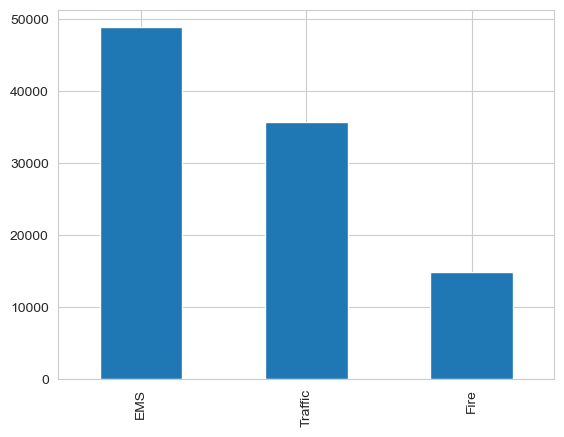

In [92]:
df["Razon"].value_counts().plot.bar()

### E4

¿Cuál es el tipo de datos que hay en la columna "timestamp"?

Conviértela en tipo "datetime"

In [93]:
type(df["timeStamp"])

pandas.core.series.Series

In [94]:
df["timeStamp"].dtype

dtype('O')

In [95]:
df["timeStamp"].values

array(['2015-12-10 17:40:00', '2015-12-10 17:40:00',
       '2015-12-10 17:40:00', ..., '2016-08-24 11:12:00',
       '2016-08-24 11:17:01', '2016-08-24 11:17:02'], dtype=object)

In [96]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df["timeStamp"].dtype

dtype('<M8[ns]')

In [97]:
print(df["timeStamp"].dt.year[0])
print(df["timeStamp"].dt.month[0])
print(df["timeStamp"].dt.day[0])
print(df["timeStamp"].dt.hour[0])
print(df["timeStamp"].dt.minute[0])
print(df["timeStamp"].dt.second[0])
print(df["timeStamp"].dt.quarter[0])

2015
12
10
17
40
0
4


In [98]:
print(df["timeStamp"].dt.dayofweek[0])

3


### E5

Crea 3 columnas con Hora, Mes, Dia_semana

In [99]:
df["Hora"] = df["timeStamp"].dt.hour
df["Mes"] = df["timeStamp"].dt.month
df["Dia_semana"] = df["timeStamp"].dt.day_of_week

### E6

Asignamos los días de la semana a una nueva columna usando "Dia_semana"

In [100]:
semana = {0:"L", 1:"M", 2:"X", 3:"J", 4:"V",5:"S",6:"D"}
df["Dia_nombre"] = df["Dia_semana"].map(semana)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Razon,Hora,Mes,Dia_semana,Dia_nombre
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,J
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,J


### E7

Crea un pivot table con el número de llamadas en función de Dia_semana y Hora

In [101]:
diaHora = df.pivot_table("title", "Dia_nombre", "Hora", aggfunc="count")
diaHora

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dia_nombre,,,,,,,,,,,,,,,,,,,,,
D,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
J,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
L,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
M,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
S,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
V,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
X,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<Axes: xlabel='Hora', ylabel='Dia_nombre'>

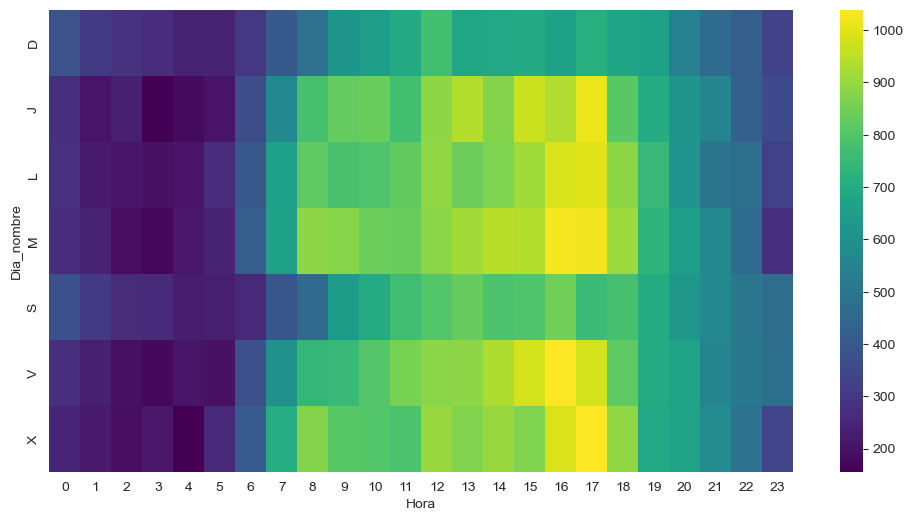

In [102]:
plt.figure(figsize=(12,6))

sns.heatmap(diaHora,cmap='viridis')

### E8

One-hot-encoding con "Razon"

In [103]:
pd.get_dummies(df["Razon"])

,EMS,Fire,Traffic
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
99487,0,0,1
99488,0,0,1
99489,1,0,0
99490,1,0,0


### E9

Sustituir los nulos de "zip" por "00000"

In [104]:
df["zip"].isnull().sum()

12855

In [105]:
df["zip"].fillna("0", inplace=True)
df["zip"] = df["zip"].astype(int).astype(str)
df["zip"].replace("0", "00000", inplace=True)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Razon,Hora,Mes,Dia_semana,Dia_nombre
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,J
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,J
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,J
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,J
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,00000,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,J


### E10

Creamos una nueva variable con valores enteros aleatorios entre 0 y 10 emulando los minutos de cada llamada

In [106]:
df["minutos"] = np.random.randint(low=0,high=10,size=len(df))

df["minutos"].value_counts()

3    10055
4    10016
9    10005
0    10003
2     9990
8     9974
6     9913
1     9909
7     9888
5     9739
Name: minutos, dtype: int64

### E11

Eliminamos una muestra del 10% de los valores 2, 5 y 8

In [107]:
indices_borrar = df.loc[df["minutos"].isin([2,5,8])].sample(frac=0.1, random_state=0).index
df.loc[indices_borrar, "minutos"] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  object        
 3   zip         99492 non-null  object        
 4   title       99492 non-null  object        
 5   timeStamp   99492 non-null  datetime64[ns]
 6   twp         99449 non-null  object        
 7   addr        98973 non-null  object        
 8   e           99492 non-null  int64         
 9   Razon       99492 non-null  object        
 10  Hora        99492 non-null  int64         
 11  Mes         99492 non-null  int64         
 12  Dia_semana  99492 non-null  int64         
 13  Dia_nombre  99492 non-null  object        
 14  minutos     96522 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 11

### E12

Sustituimos los nulos por la media, el valor anterior y el posterior

In [108]:
df["minutos"].fillna(df["minutos"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  object        
 3   zip         99492 non-null  object        
 4   title       99492 non-null  object        
 5   timeStamp   99492 non-null  datetime64[ns]
 6   twp         99449 non-null  object        
 7   addr        98973 non-null  object        
 8   e           99492 non-null  int64         
 9   Razon       99492 non-null  object        
 10  Hora        99492 non-null  int64         
 11  Mes         99492 non-null  int64         
 12  Dia_semana  99492 non-null  int64         
 13  Dia_nombre  99492 non-null  object        
 14  minutos     96522 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 11

In [109]:
df["minutos"].mean()

4.482304552330039

In [110]:
df["minutos"].fillna(method="ffill")

0        6.0
1        4.0
2        7.0
3        3.0
4        6.0
        ... 
99487    9.0
99488    3.0
99489    2.0
99490    2.0
99491    3.0
Name: minutos, Length: 99492, dtype: float64

In [111]:
df["minutos"].fillna(method="bfill")

0        6.0
1        4.0
2        7.0
3        3.0
4        6.0
        ... 
99487    9.0
99488    3.0
99489    2.0
99490    2.0
99491    3.0
Name: minutos, Length: 99492, dtype: float64

### E12+1

Convertimos los valores de "desc" por enteros 